# My Hypothesis


Regarding the hypothesis, I reckon the car's price hinges on several factors:

When it comes to unraveling the mysteries behind car pricing, the luxury of a brand commands a 10% share, with the type of fuel and transmission sharing a similar percentage, contributing another 10%. Power plays a substantial role, accounting for 20%, while a significant 30% is linked to the mileage. The remaining 30% is divvied up among various other parameters. Decoding the truth necessitates a methodical and strategic approach.

My notion involves tweaking our dataset. I plan to introduce new columns denoting fuel types, represented by numerical codes: Gasoline-1, Diesel-2, Electric-3. Additionally, I aim to categorize car brands into three tiers based on their luxury status, factoring in their car prices and several other parameters. Following this, I'll explore correlations to unearth the reality. 

In [6]:
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [8]:
data = pd.read_csv('newestcars.csv')

In [9]:
def change_fuel(fuel):
    if fuel.lower() == "бензин":
        return 1
    if fuel.lower() == 'дизель':
        return 2
    return 3


def change_tr(tr):
    if tr == 'Механика':
        return 1
    return 2


data['trms'] = data.transmission.apply(change_tr)
data['fuel'] = data.fueltype.apply(change_fuel)
data.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,bodytype,color,fueltype,year,mileage,transmission,...,enginename,enginedisplacement,date,power_average,price_average,year_average,branding,Color,trms,fuel
0,0,0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,2005,240000,Механика,...,information not given,information not given,2023-04-02 00:00:00,112.0,784790,2005.0,Other,gray,1,1
1,1,1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996,37000,Механика,...,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,33.0,86463,1995.0,Other,gray,1,1
2,2,2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002,295000,АКПП,...,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,92.0,341564,2000.0,Toyota,orange,2,1
3,3,3,Лада,Гранта,Лифтбек,Серый,Бензин,2018,16000,Механика,...,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,90.0,687676,2018.0,Other,gray,1,1
4,4,4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,2022,0,Механика,...,information not given,information not given,2023-04-02 00:00:00,82.0,874968,2022.0,Other,gray,1,1


In [10]:
data.head()


def int_mean(arg):
    try:
        return int(arg.mean())
    except ValueError:
        return np.nan


def lux(car_bruum):
    global cm, pm
    return car_bruum / cm * 2


def lux1(pow):
    global cm, pm
    return pow / pm


pivot_df = data.pivot_table(index='brand', values=['price', 'power', ], aggfunc=int_mean)
data = data.merge(pivot_df, on='brand', how='left', suffixes=('', '_avrg_brand'))
cm = data.price_avrg_brand.mean()
pm = data.power_avrg_brand.mean()

data.tail()

,Unnamed: 0.1,Unnamed: 0,brand,name,bodytype,color,fueltype,year,mileage,transmission,...,date,power_average,price_average,year_average,branding,Color,trms,fuel,power_avrg_brand,price_avrg_brand
1275105,1275105,1275105,BMW,X1,Джип 5 дв.,Серый,Дизель,2013,275000,АКПП,...,2023-06-01 00:00:00,169.0,1880223,2013.0,BMW,blue,2,2,241,3422132
1275106,1275106,1275106,Лада,2105,Седан,Белый,Бензин,1985,300000,Механика,...,2023-06-01 00:00:00,71.0,93859,1991.0,Other,gray,1,1,86,461527
1275107,1275107,1275107,Toyota,Camry,Седан,Серый,Бензин,2020,32000,АКПП,...,2023-06-01 00:00:00,179.0,1834807,2009.0,Toyota,orange,2,1,139,1303645
1275108,1275108,1275108,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995,354000,Механика,...,2023-06-01 00:00:00,80.0,404464,1998.0,Other,gray,1,1,86,461527
1275109,1275109,1275109,Лада,4x4 2121 Нива,Джип 3 дв.,Белый,Бензин,1995,354000,Механика,...,2023-06-01 00:00:00,80.0,404464,1998.0,Other,gray,1,1,86,461527


In [11]:
data['luxury'] = data['price_avrg_brand'].apply(lux) + data['power_avrg_brand'].apply(lux1)
data.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,bodytype,color,fueltype,year,mileage,transmission,...,power_average,price_average,year_average,branding,Color,trms,fuel,power_avrg_brand,price_avrg_brand,luxury
0,0,0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,2005,240000,Механика,...,112.0,784790,2005.0,Other,gray,1,1,144,1516654,3.130276
1,1,1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996,37000,Механика,...,33.0,86463,1995.0,Other,gray,1,1,86,461527,1.251371
2,2,2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002,295000,АКПП,...,92.0,341564,2000.0,Toyota,orange,2,1,139,1303645,2.798490
3,3,3,Лада,Гранта,Лифтбек,Серый,Бензин,2018,16000,Механика,...,90.0,687676,2018.0,Other,gray,1,1,86,461527,1.251371
4,4,4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,2022,0,Механика,...,82.0,874968,2022.0,Other,gray,1,1,86,461527,1.251371


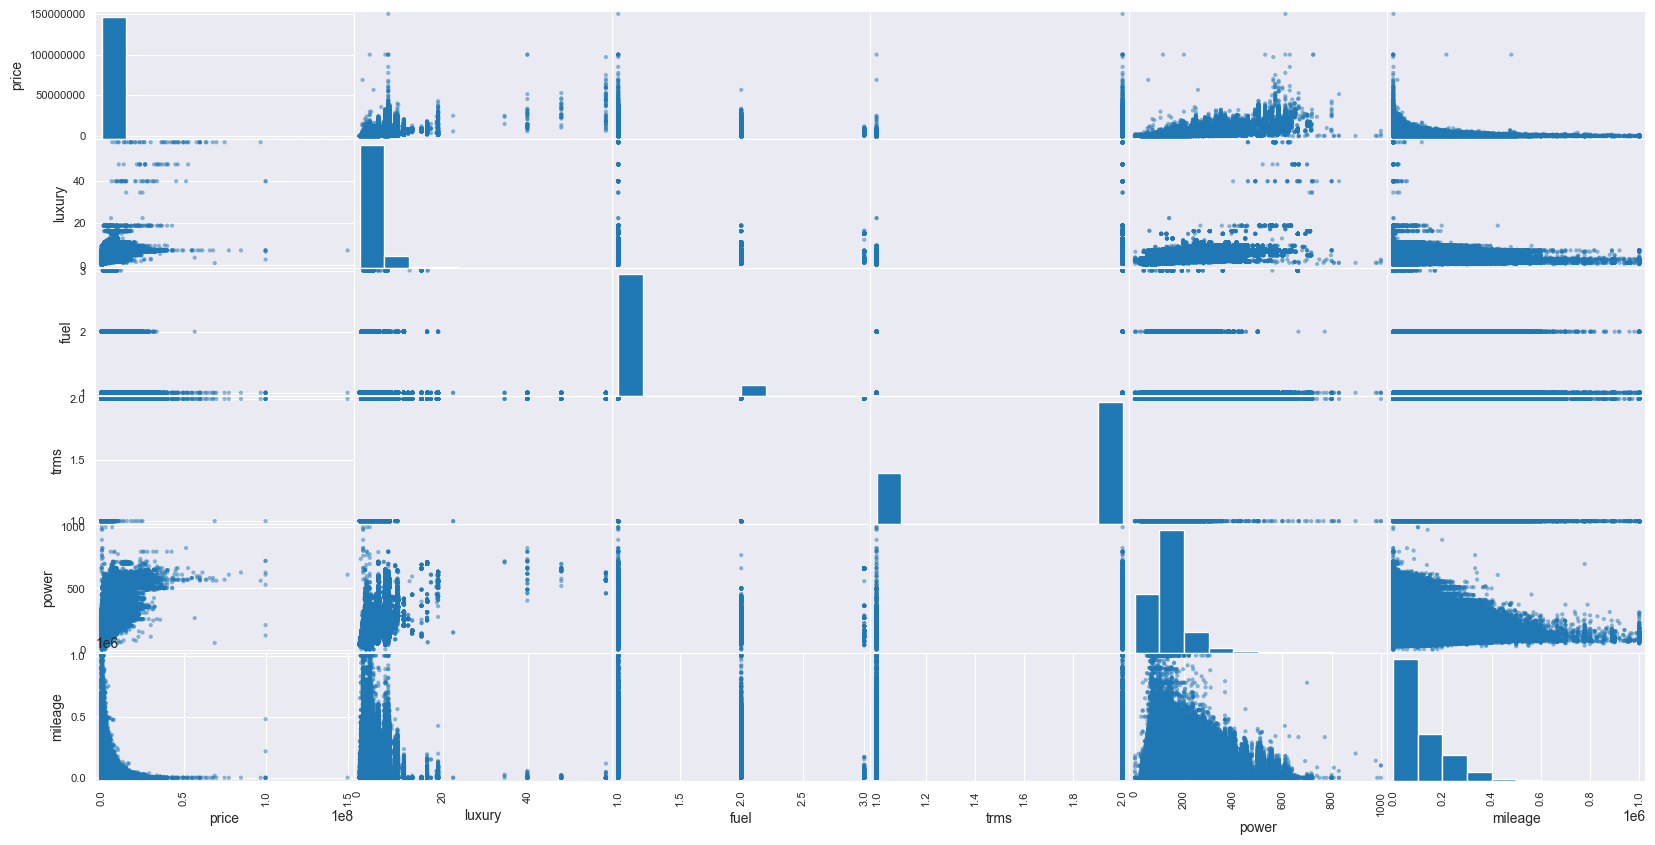

In [12]:
pd.plotting.scatter_matrix(pd.DataFrame(data=data, columns=['price', 'luxury', 'fuel', 'trms', 'power', 'mileage']), figsize=(20, 10))
plt.show()

Returning to my hypothesis, let's delve into its key facets:

1) The allocation for fuel and transmission closely mirrors each other, sharing a proportional percentage.
2) Interestingly, this percentage aligns with the weight given to the luxury factor in the pricing equation.
3) Contrarily, the horsepower of a specific car exerts twice the influence on its price compared to the combined impact of fuel and transmission.
4) Significantly, and according to my assumption, the predominant factor affecting price is the mileage, which carries three times the weight in the pricing equation.

Let's delve into correlations to unveil the truth.

In [13]:
print(data[['price', 'luxury', 'fuel', 'trms', 'power', 'mileage']].corr())

            price    luxury      fuel      trms     power   mileage
price    1.000000  0.509580  0.253799  0.289304  0.608761 -0.267206
luxury   0.509580  1.000000  0.189809  0.393493  0.623304 -0.072297
fuel     0.253799  0.189809  1.000000  0.082182  0.186843  0.009128
trms     0.289304  0.393493  0.082182  1.000000  0.403277 -0.036873
power    0.608761  0.623304  0.186843  0.403277  1.000000 -0.045202
mileage -0.267206 -0.072297  0.009128 -0.036873 -0.045202  1.000000


* 	Price vs. Luxury (0.509580):
There is a moderate positive correlation between price and luxury. This suggests that as the price of a car increases, it is likely to be associated with higher perceived luxury.
* 	Price vs. Fuel Efficiency (0.253799):
There is a positive correlation between price and fuel efficiency, although it is relatively weak. This could mean that higher-priced cars tend to have slightly better fuel efficiency, but the relationship is not very strong.
* 	Price vs. Transmission (0.289304):
There is a positive correlation between price and transmission. This could indicate that higher-priced cars are more likely to have certain transmission features or qualities.
* 	Price vs. Power (0.608761):
There is a strong positive correlation between price and power. This suggests that more expensive cars are likely to have higher power or engine performance.
* 	Price vs. Mileage (-0.267206):
There is a negative correlation between price and mileage. This implies that as the price of a car increases, it is likely to be associated with lower mileage, which means higher-end cars may sacrifice fuel efficiency for other performance features.

The most significant correlations with the price are observed with power (0.6), followed by luxury (0.5), and then transmission (0.28). Surprisingly, mileage (-0.26) and the type of fuel (0.25) exhibit comparatively weaker relationships with price...

Contrary to initial expectations, the analysis reveals that power plays a more crucial role than mileage in influencing the price. Furthermore, it is interesting to note that price doesn't significantly depend on mileage. Transmission and fuel show similar correlation grades, aligning with the initial assumptions. A noteworthy finding is the substantial impact of a car brand's luxury on the pricing process. 

However, it's essential to emphasize that these correlations are not absolute (i.e., not close to ±1). Consequently, the hypothesis suggesting stronger dependencies among these factors is proven false. The identified factors contribute to price formation but to a lesser extent than initially perceived, representing smaller percentages in the overall correlation structure.